## EDA AND FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
directory_name = "cleaned_data"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

In [3]:
path = 'cleaned_data'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs, ignore_index=False).groupby('DATE').sum()

In [4]:
df_final.head()

,home_ow_rate,unemployed_rate,p_saving_rate,GDP,income,new_private_house,population,permit,total_emp_cons,emratio,...,labor_percent,target,monthly_supply,mortgage_rate,house_st,all_Const_Emp,PPI_Concrete,PPI_Cement,new_private_hw_under,IPI_Cement
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.9,6.6,9.4,4722.156,3820.2,1862.0,241857.0,1690.0,5007.0,61.0,...,65.4,63.735,6.0,9.2040,1774.0,722.3,109.3,100.1,1090.0,123.7373
1987-02-01,63.9,6.6,8.2,4722.156,3845.0,1771.0,242005.0,1689.0,5038.0,61.1,...,65.5,64.135,6.2,9.0825,1784.0,724.2,109.3,100.8,1096.0,123.1670
1987-03-01,63.9,6.6,8.1,4722.156,3863.8,1694.0,242166.0,1704.0,5039.0,61.2,...,65.5,64.470,6.0,9.0350,1726.0,727.9,109.3,101.2,1084.0,122.5706
1987-04-01,63.9,6.3,4.1,4806.160,3875.4,1735.0,242338.0,1601.0,5053.0,61.3,...,65.4,64.973,6.0,9.8325,1614.0,728.1,109.3,100.8,1079.0,123.5345
1987-05-01,63.9,6.3,7.8,4806.160,3908.6,1713.0,242516.0,1500.0,5080.0,61.6,...,65.7,65.547,6.7,10.5960,1628.0,727.6,108.7,101.2,1070.0,123.8454


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 1987-01-01 to 2023-07-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   home_ow_rate          439 non-null    float64
 1   unemployed_rate       439 non-null    float64
 2   p_saving_rate         439 non-null    float64
 3   GDP                   439 non-null    float64
 4   income                439 non-null    float64
 5   new_private_house     439 non-null    float64
 6   population            439 non-null    float64
 7   permit                439 non-null    float64
 8   total_emp_cons        439 non-null    float64
 9   emratio               439 non-null    float64
 10  MSPUS                 439 non-null    float64
 11  labor_percent         439 non-null    float64
 12  target                439 non-null    float64
 13  monthly_supply        439 non-null    float64
 14  mortgage_rate         439 non-null    float64
 15  house_st    

In [6]:
df_final.describe()

,home_ow_rate,unemployed_rate,p_saving_rate,GDP,income,new_private_house,population,permit,total_emp_cons,emratio,...,labor_percent,target,monthly_supply,mortgage_rate,house_st,all_Const_Emp,PPI_Concrete,PPI_Cement,new_private_hw_under,IPI_Cement
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,65.777221,5.776993,6.331435,13236.389663,11171.951708,1301.466970,293349.423690,1355.164009,6288.307517,61.353531,...,65.113440,141.151487,5.899772,6.315856,1337.020501,742.157631,179.159756,176.834228,954.018223,119.565531
std,1.744104,1.676957,2.888201,5902.255151,5197.803116,353.450626,28737.180981,390.759196,959.538073,2.067575,...,1.786754,60.304741,1.740840,2.172124,379.076753,123.747671,51.907865,57.243653,289.464053,23.911004
min,63.100000,3.400000,1.400000,4722.156000,3820.200000,520.000000,241857.000000,513.000000,4570.000000,51.300000,...,60.100000,63.735000,3.300000,2.684000,478.000000,542.600000,108.700000,100.100000,414.000000,66.350800
25%,64.100000,4.600000,4.900000,7868.468000,6539.100000,1088.500000,268602.000000,1089.500000,5424.500000,59.750000,...,63.100000,81.733000,4.500000,4.316250,1103.000000,633.150000,141.400000,129.200000,760.000000,101.180200
50%,65.500000,5.400000,6.100000,12922.656000,10464.100000,1333.000000,295359.000000,1381.000000,6402.000000,61.900000,...,66.000000,141.048000,5.600000,6.262000,1377.000000,734.300000,163.200000,171.800000,973.000000,116.904800
75%,67.400000,6.600000,7.450000,17518.508000,14724.800000,1546.000000,319331.500000,1624.000000,7092.000000,62.900000,...,66.500000,178.937000,6.800000,7.838000,1582.500000,826.250000,207.000000,210.050000,1123.000000,139.426100
max,69.400000,14.700000,32.000000,27623.543000,24471.800000,2245.000000,335329.000000,2263.000000,7967.000000,64.700000,...,67.300000,310.162000,12.200000,11.260000,2273.000000,1022.000000,336.455000,331.181000,1710.000000,192.032200


### Plotting density plot for all the numerical features

<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

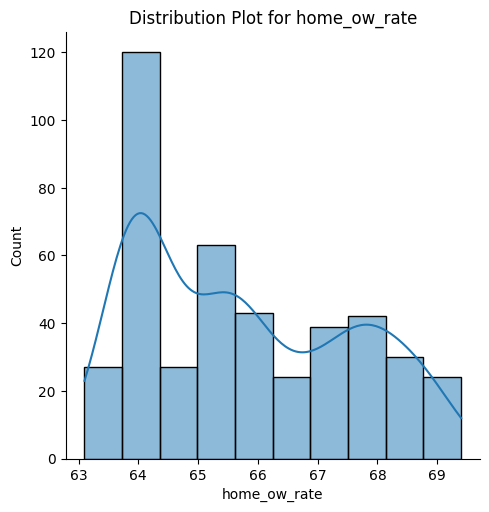

<Figure size 600x400 with 0 Axes>

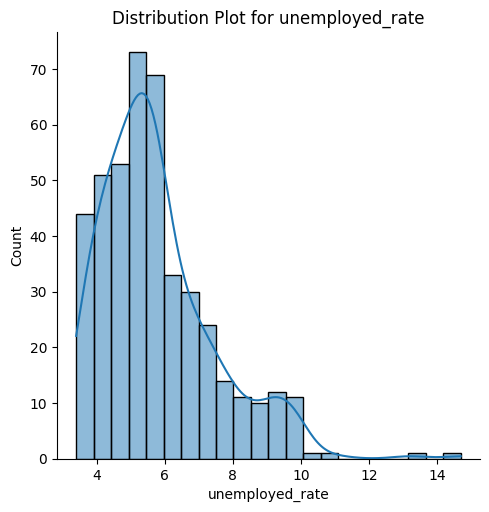

<Figure size 600x400 with 0 Axes>

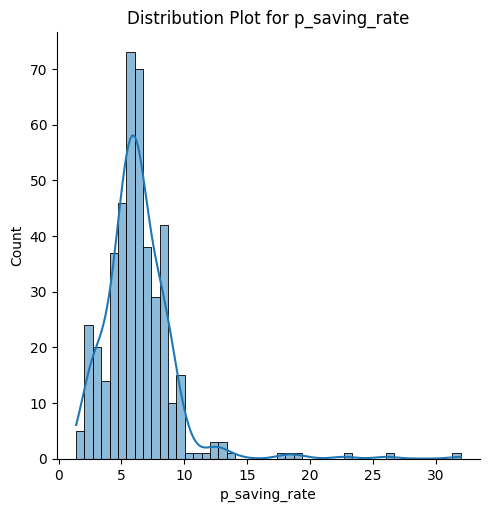

<Figure size 600x400 with 0 Axes>

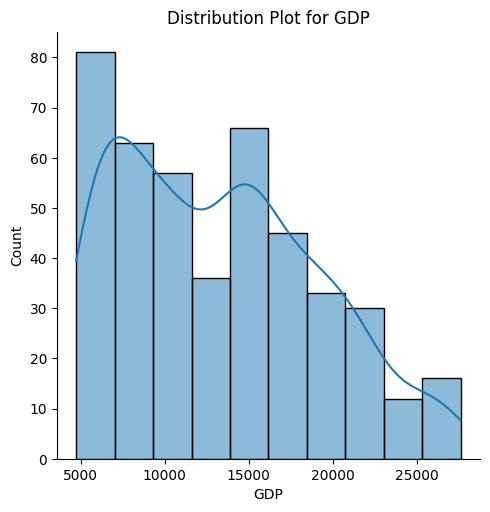

<Figure size 600x400 with 0 Axes>

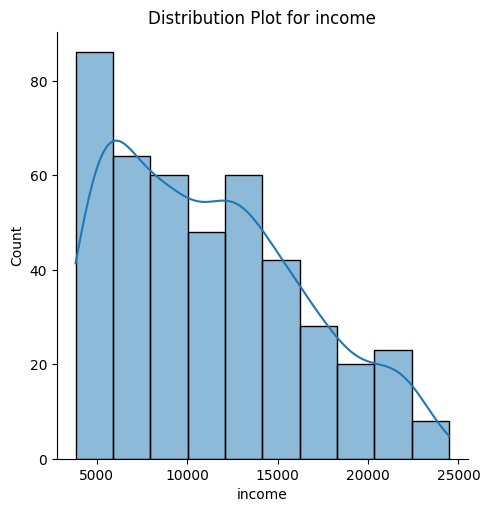

<Figure size 600x400 with 0 Axes>

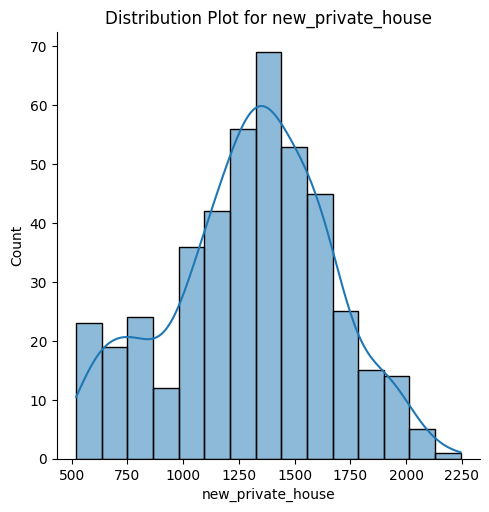

<Figure size 600x400 with 0 Axes>

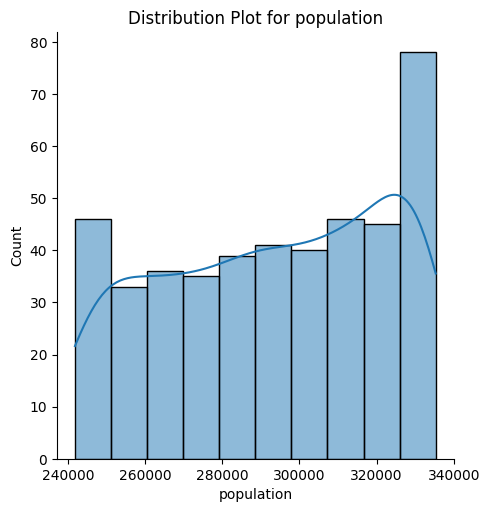

<Figure size 600x400 with 0 Axes>

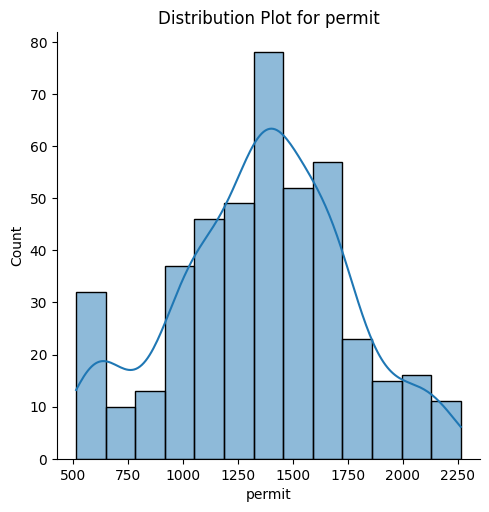

<Figure size 600x400 with 0 Axes>

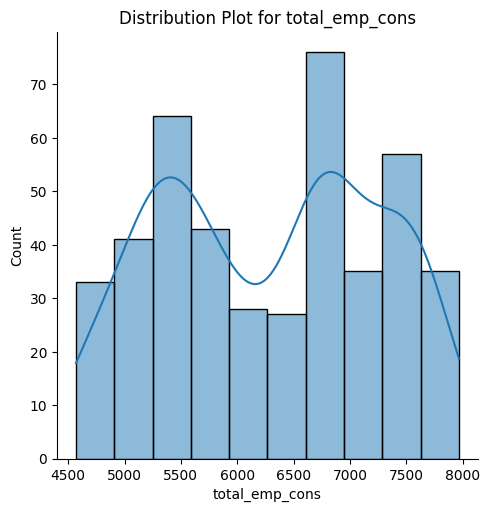

<Figure size 600x400 with 0 Axes>

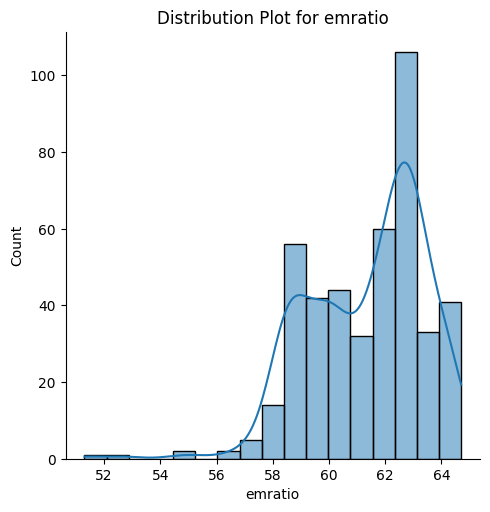

<Figure size 600x400 with 0 Axes>

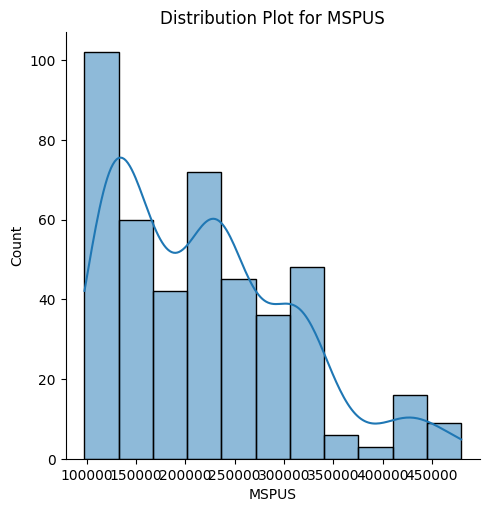

<Figure size 600x400 with 0 Axes>

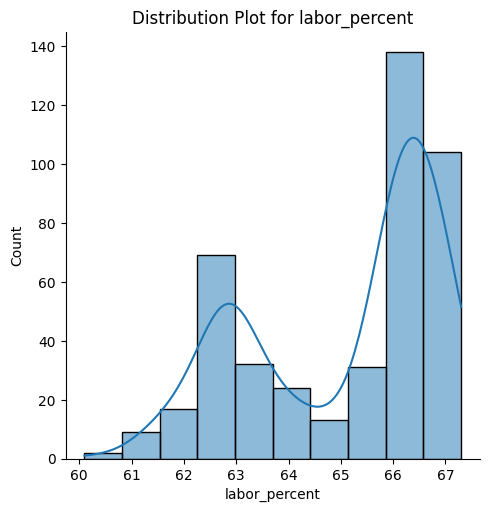

<Figure size 600x400 with 0 Axes>

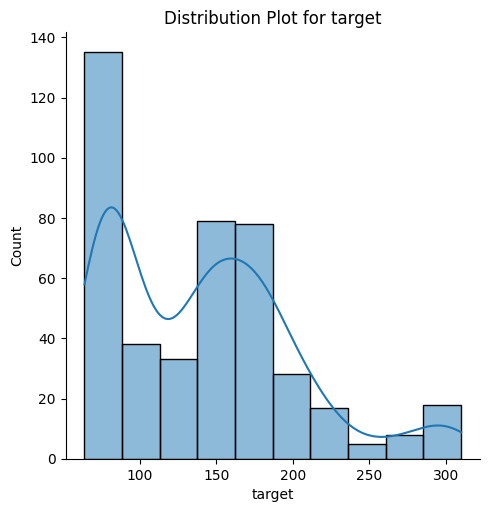

<Figure size 600x400 with 0 Axes>

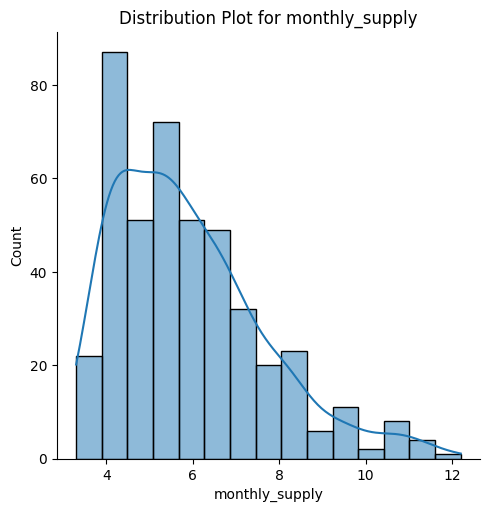

<Figure size 600x400 with 0 Axes>

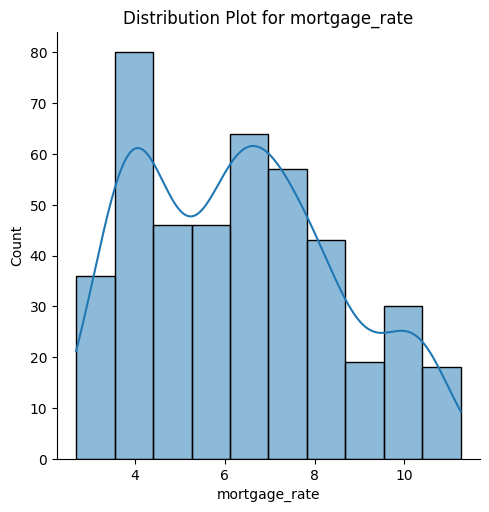

<Figure size 600x400 with 0 Axes>

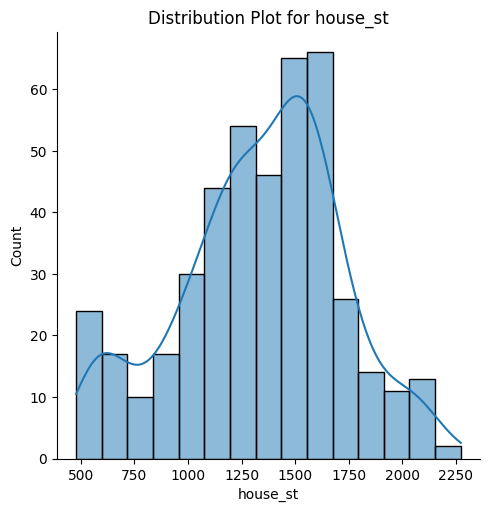

<Figure size 600x400 with 0 Axes>

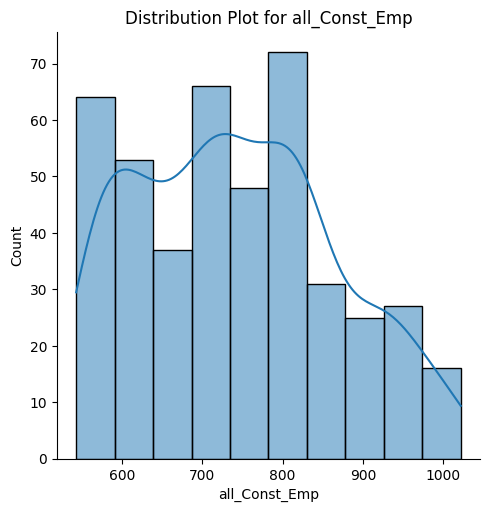

<Figure size 600x400 with 0 Axes>

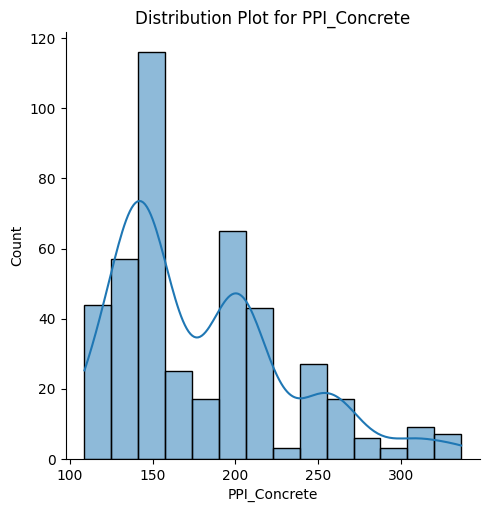

<Figure size 600x400 with 0 Axes>

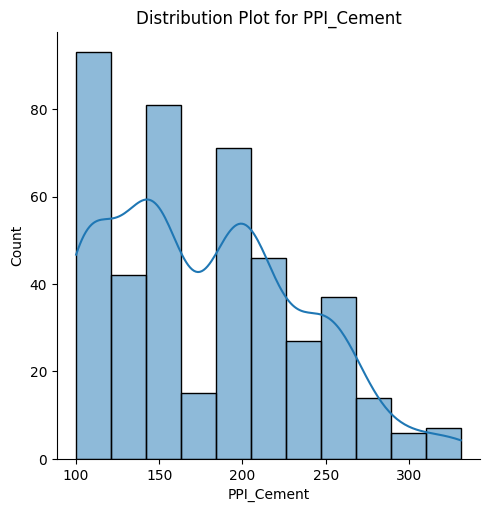

<Figure size 600x400 with 0 Axes>

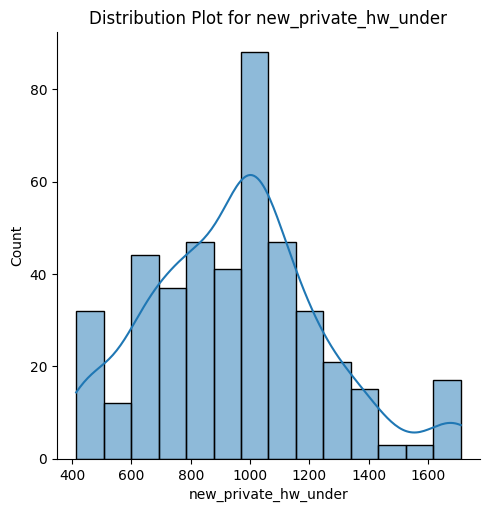

<Figure size 600x400 with 0 Axes>

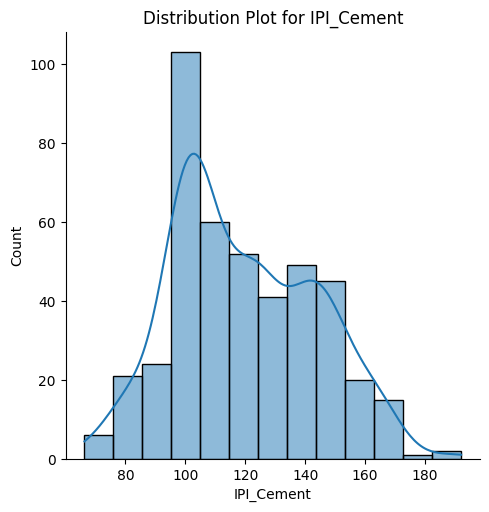

In [7]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

### Plotting boxplot for analyzing the outliers in the data

<Figure size 1200x600 with 0 Axes>

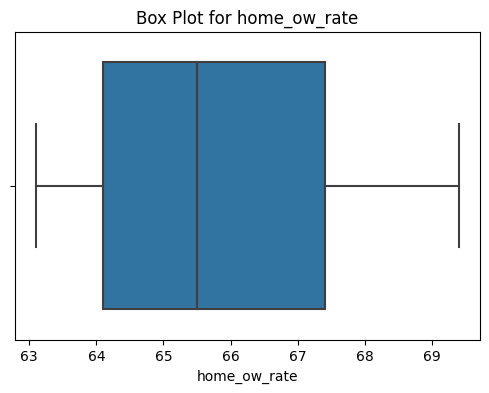

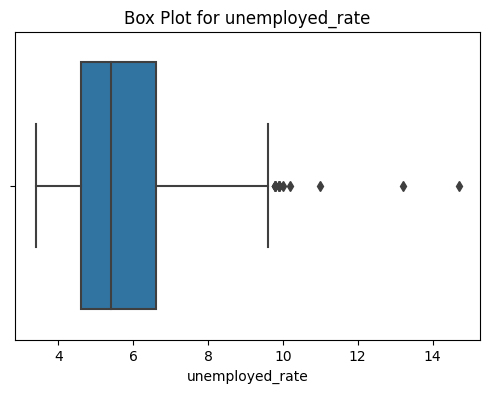

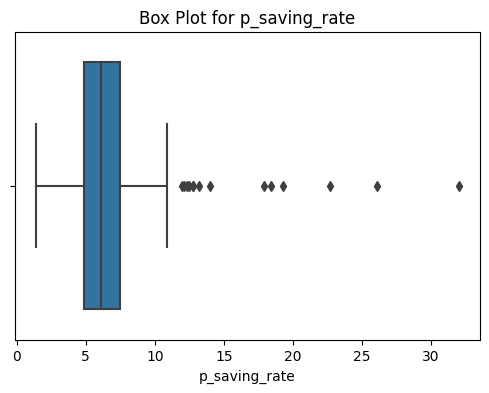

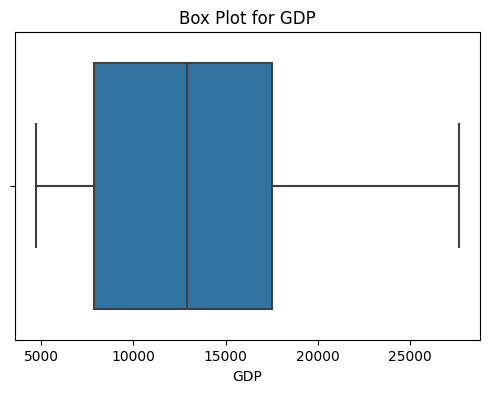

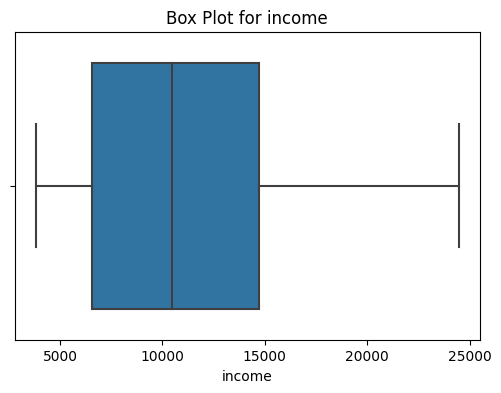

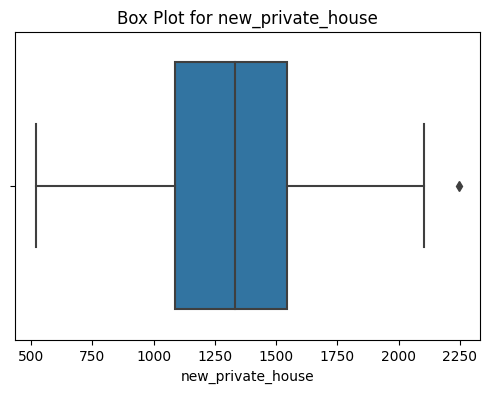

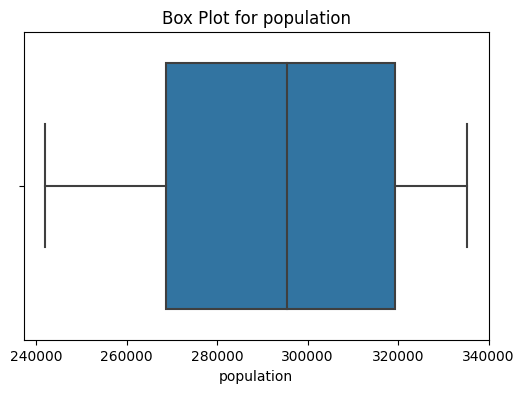

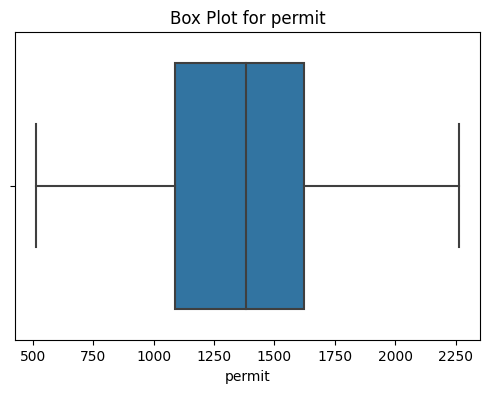

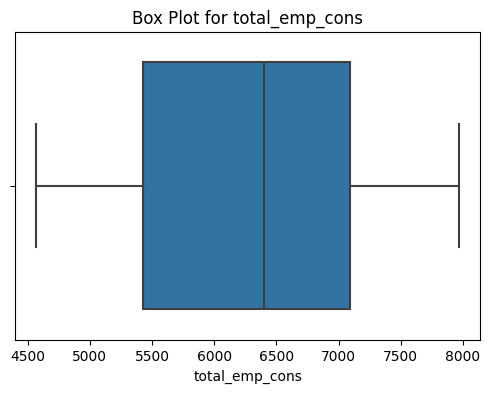

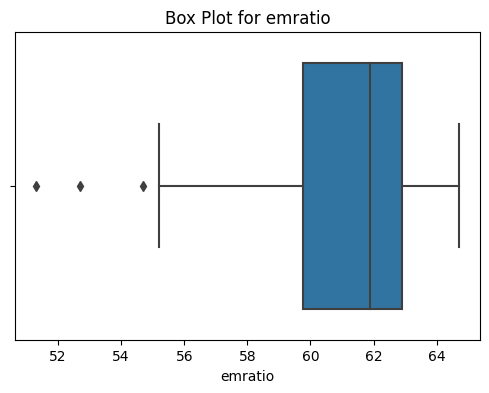

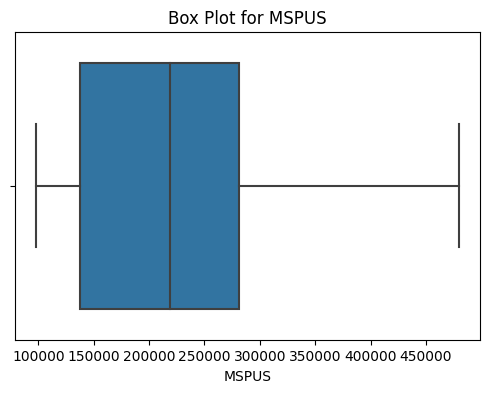

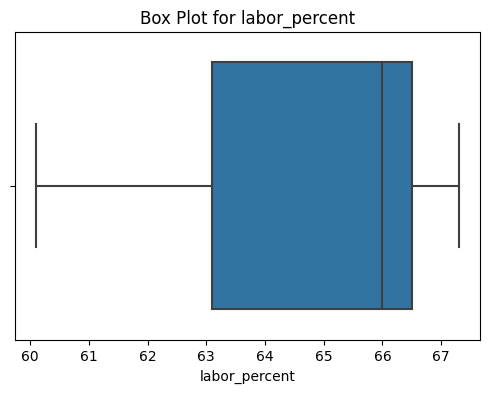

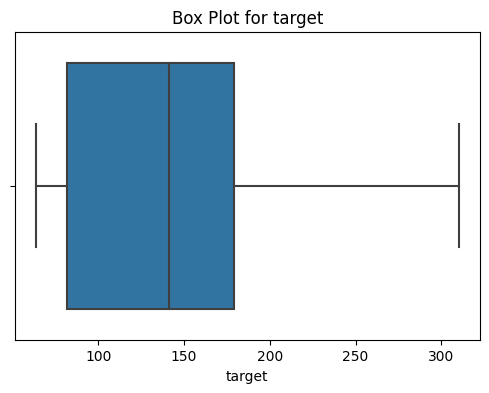

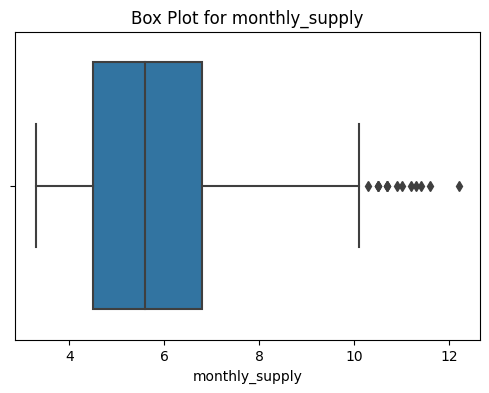

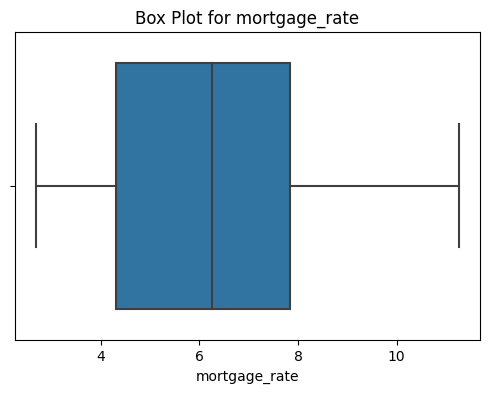

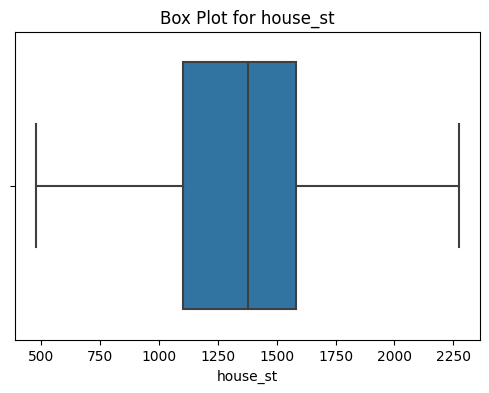

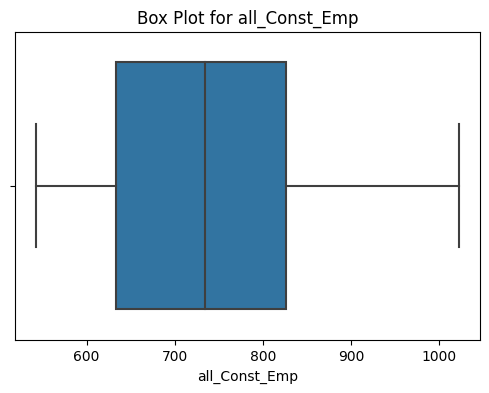

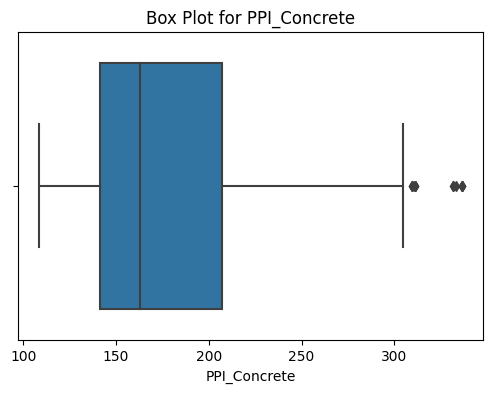

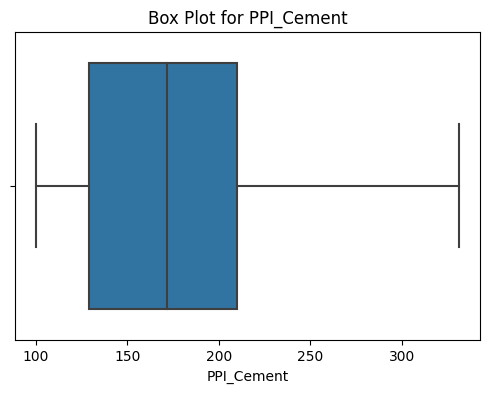

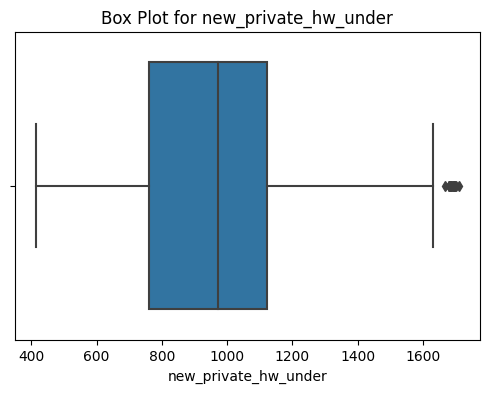

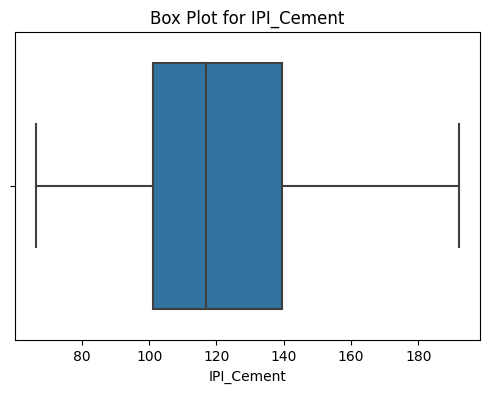

In [8]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

**We have outliers in few features:**

- p_saving_rate
- PPI_Concrete
- new_private_house
- emratio
- new_private_hw_under
- monthly_supply
- unemployed_rate

### Treating Skewness and Outliers:

#### p_saving_rate

In [9]:
df_final['p_saving_rate'].skew()

3.3130896915520984

- Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [10]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

In [11]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0750000000000006
11.275


(None, None)

In [12]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

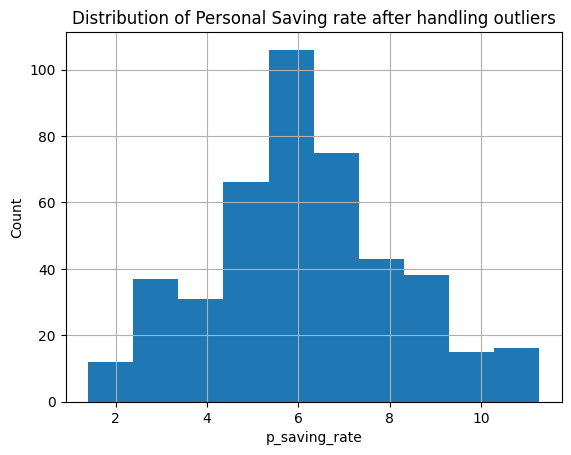

In [13]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

#### PPI_Concrete

In [14]:
df_final['PPI_Concrete'].skew()

0.9333165648577373

- Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

In [15]:
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])

<Axes: >

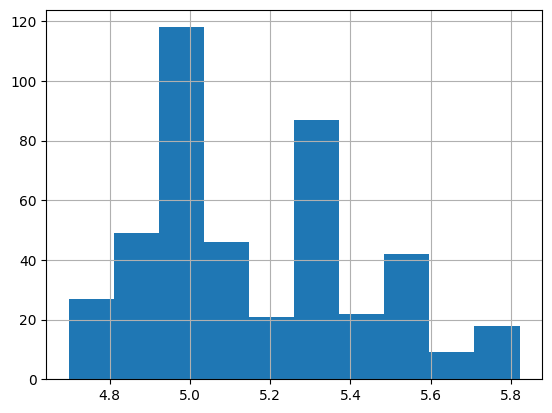

In [16]:
df_final['PPI_Concrete'].hist()

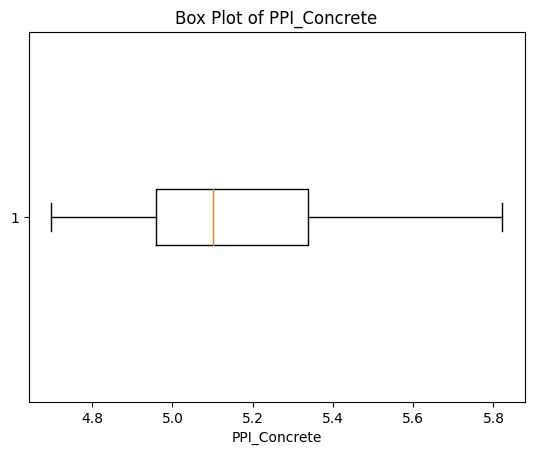

In [17]:
plt.boxplot(df_final['PPI_Concrete'], vert=False)
plt.xlabel('PPI_Concrete')
plt.title('Box Plot of PPI_Concrete')
plt.show()

- Skewness and outliers both removed by using log transformation.

#### new_private_house

In [18]:
df_final['new_private_house'].skew()

-0.21940615301839025

- New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply yeo-johnson transformation for removing skewness.

In [19]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

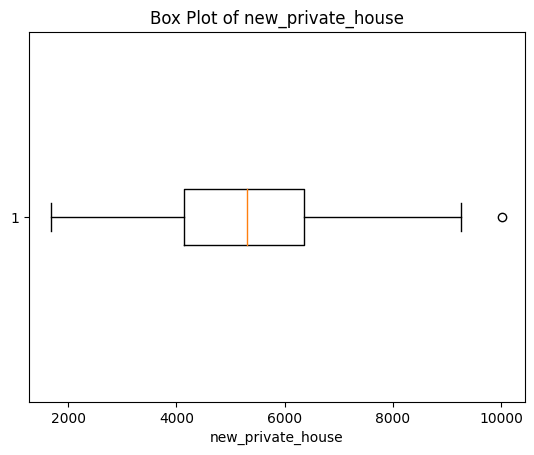

In [20]:
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [21]:
max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])


#### emratio

In [22]:
df_final['emratio'].skew()

-0.7538612695782946

- Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [23]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR =q2-q1

In [24]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

55.025000000000006
67.625


(None, None)

In [25]:
df_final.loc[df_final['emratio'] <=lower_bridge,'emratio'] = lower_bridge

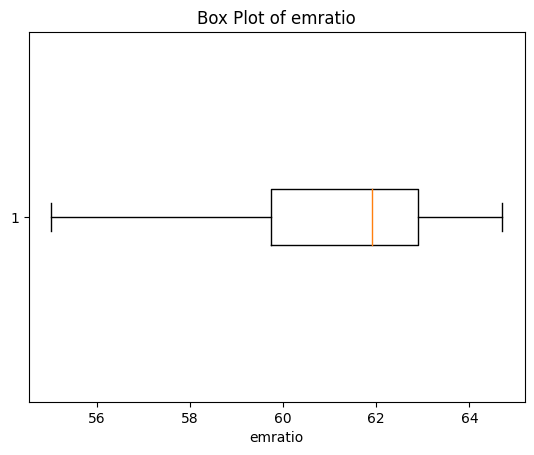

In [26]:
plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('emratio')
plt.title('Box Plot of emratio')
plt.show()

#### new_private_hw_under

In [27]:
df_final['new_private_hw_under'].skew()

0.36887282115041053

- New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [28]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

In [29]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

215.5
1667.5


(None, None)

In [30]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

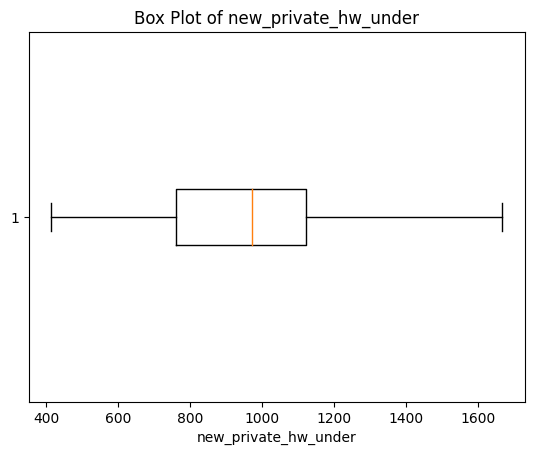

In [31]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

#### Monthly_supply

In [32]:
df_final['monthly_supply'].skew()

1.0003922160771488

- Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [33]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

In [34]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0500000000000003
10.25


(None, None)

In [35]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge

<Axes: >

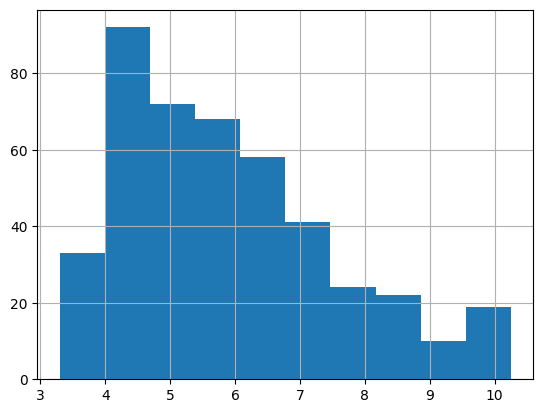

In [36]:
df_final['monthly_supply'].hist()

#### unemployed_rate

In [37]:
df_final['unemployed_rate'].skew()

1.2751925262720107

In [38]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [39]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.5999999999999996
9.6


(None, None)

In [40]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

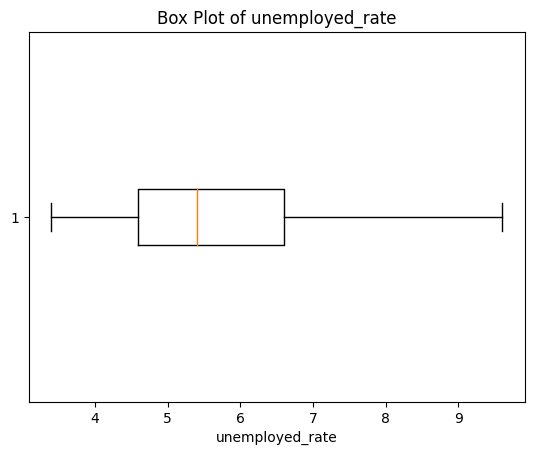

In [41]:
plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

### Understanding the Correlations between the data

In [42]:
corr_matrix= df_final.corr()
corr_matrix['target'].sort_values(ascending=False)

target                  1.000000
MSPUS                   0.980144
PPI_Cement              0.964074
GDP                     0.960633
income                  0.955608
PPI_Concrete            0.939072
population              0.896974
total_emp_cons          0.812130
new_private_hw_under    0.634935
all_Const_Emp           0.560479
home_ow_rate            0.207294
monthly_supply          0.169504
permit                  0.127189
house_st               -0.001742
new_private_house      -0.068468
unemployed_rate        -0.249211
IPI_Cement             -0.260807
p_saving_rate          -0.286001
emratio                -0.538776
mortgage_rate          -0.730709
labor_percent          -0.788313
Name: target, dtype: float64

### Checking Multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns

vif_data["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

print(vif_data)

                 feature            VIF
0           home_ow_rate   29878.949565
1        unemployed_rate    4024.141108
2          p_saving_rate      50.163101
3                    GDP    4057.674915
4                 income    2182.585159
5      new_private_house     258.529654
6             population   21683.542244
7                 permit     557.943594
8         total_emp_cons    5181.932990
9                emratio  824497.061929
10                 MSPUS    1179.495357
11         labor_percent  838701.176474
12                target    1410.107395
13        monthly_supply      83.333376
14         mortgage_rate     229.214974
15              house_st     531.101442
16         all_Const_Emp    2206.480897
17          PPI_Concrete   45709.736199
18            PPI_Cement    1345.402026
19  new_private_hw_under     716.831772
20            IPI_Cement     347.888327


We have high multicollinearity in our data. Need to handle this before fedding into the model

In [44]:
df_final.to_csv("df_final.csv")